<a href="https://colab.research.google.com/github/samuelbolugee/PythonDSProjects/blob/main/EDADetailedOnPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis - More on Pandas, and Applications towards Deriving Insights

**"If we possess the capability (and apply that) to carefully examine data and pose appropriate inquiries that can have meaningful impact on our businesses and everyday life, the process of EDA can be stunningly effective."**

In this final notebook on EDA (for now, I guess), I will be looking at applying some of the previous techniques in the last two notebooks (plus more on Pandas) towards deriving relevant insights from real-world data.

We will be utilizing the 1995 UCI ML Breast Cancer Wisconsin (Diagnostic) dataset via Scikitlearn. More on that later.

As always, this is a learning process for me, so let's begin!

##Importing the Dataset

To import the dataset, we must use Scikitlearn's `datasets.load_breast_cancer()` method, which is as easy as saying:


```
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
```
Let's also not forget to import all relevant libraries (Pandas, NumPy, Matplotlib and Seaborn)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

Next, we convert the dataset into a Pandas DataFrame. If you try to use it as is with Pandas, you'll get an error.

In [3]:
# Convert the Bunch object dataset into a Pandas DataFrame: This is something we can work with.
df = pd.DataFrame(data = dataset.data, columns=dataset.feature_names) # The NumPy arrays are what we are putting together (via the parameters) to form the DataFrame
df["target"] = dataset.target #Creating the target class
# Let's see the dataset now.
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Just one question...

What is a Bunch object?

Bunch objects are sometimes used as an output for functions and methods. They extend dictionaries by enabling values to be accessed by key, bunch["value_key"] , or by an attribute, bunch.

Bunch is a subclass of the Dict class, basically, it's like a dictionary and supports all dictionary methods, but it allows for attribute type access, i.e. using the keys as attributes. In a Bunch, you can access the attributes via dot notations, something which is not possible using a dictionary.

Notice how we were able to access the data and column names via dot notations? That won't be possible with a dictionary.

See these for more: [Stack Overflow](https://stackoverflow.com/questions/56286221/what-is-the-difference-between-bunch-and-dictionary-type-in-python) and [Scikitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html).


## More on Pandas...

I already covered some important methods like:

```
pd.read_csv()
df.describe()
df.head()
df.tail()
df.shape()
df.info()
```
I also covered checking for duplicate and missing values, unique value counts, etc., in previous notebooks. I will still revisit them here, since they are necessary, but I will also look at some other ones, like df.iloc(), df.loc(), df.assign(), df.query(), df.sort_values(), and more.


In [4]:
df.describe

<bound method NDFrame.describe of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean c

In [5]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [6]:
df.shape

(569, 31)

In the context of data analysis, our focus would be to examine the varying characteristics of different samples and their respective distribution patterns across the target classes.

We would want to check a few things: missing values, duplicate values, ambiguity in variable names, whether feature engineering (I'll talk briefly on this later) would be necessary or not, and so on.

We'd also want to perform univariate and multivariate analysis on our data (with specific focus on the features that interest us).

**BTW:** Feature engineering is the process of selecting and transforming raw data into meaningful features. It involves identifying relevant variables, removing redundant or irrelevant information, and creating new features that can improve the accuracy and efficiency of predictive models.

##Understanding Categorical Variables

We can try to get an understanding of our target class better. To do this, we can start by using the `.value_counts()` method (under Pandas DataFrame), which is a very useful function to help us ascertain the number of values of a given variable in our dataset.

We can even create a plot to show it!

In [7]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

<Axes: >

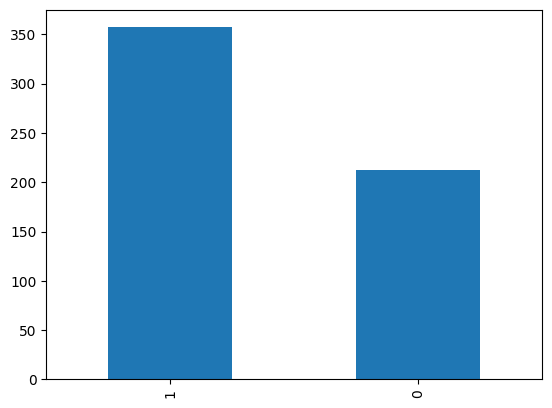

In [8]:
# Using Matplotlib to plot distribution of target class
df['target'].value_counts().plot(kind='bar')

It looks too plain. Let's spice it up a bit.

<Axes: xlabel='target', ylabel='count'>

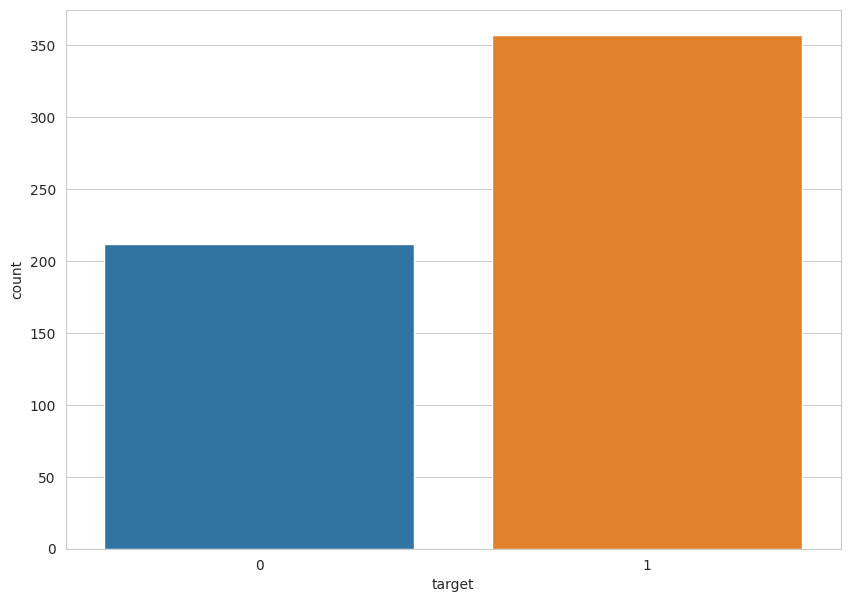

In [9]:
# Using Seaborn
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(x = df['target'])

###df.groupby()

This method allows you to group data by one or more columns, and by extension, allows you to perform more complex analysis on categorical data through aggregate functions like **count** and **mean.**

Usually, the syntax is as follows:

```
df.groupby(by = Variable).(aggregation method)

#e.g

df.groupby(by = 'Price').mean()
```
It will only return a DataFrame with numeric columns only. The `by` parameter inside the `groupby` method defines the column (Variable) on which you want to perform group by operation, and then `mean()` outside of parentheses is the aggregation method.


Let's test it out.

In [10]:
df.groupby(by = 'target').mean()

#This finds the mean of all atributes for the two categories

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


We can interpret this as follows:

The average mean radius of measurements with target class 0 is 17.46283.
The average mean radius of measurements with target class 1 is 12.146524.

And so on, etc.

We can also groupby on different levels of a hierarchical index (a hierarchical index is a method of creating structured group relationships in data). These hierarchical indexes, or MultiIndexes, are highly flexible and offer a range of options when performing complex data queries.

A MultiIndex can be created from a list of arrays (using MultiIndex.from_arrays() ), an array of tuples (using MultiIndex.from_tuples() ), a crossed set of iterables (using MultiIndex.from_product() ), or a DataFrame (using MultiIndex.from_frame() ). See [here for more.](https://pandas.pydata.org/docs/user_guide/advanced.html)

In [11]:
# Implementing groupby() on hierarchical indexes

#First, we create arrays. The number of arrays wil be the depth of our hierarchical indexing

arrays = [['Eagle', 'Eagle', 'Chicken', 'Chicken'], ['Tamed', 'Wild', 'Tamed', 'Wild'], ['Grey', 'Black', 'White', 'White']]

# Next, we create the index variable using the MultiIndex.from_arrays(), since we are extracting from list of arrays (duh!)
# We pass the list of arrays as a parameter, and then create a tuple of names corresponding to the arrays.
index = pd.MultiIndex.from_arrays(arrays, names = ('Animal', 'Type', 'Colour'))

#Now, we add our values
dtf = pd.DataFrame({'Max Speed': [330., 320., 270., 215.,]}, index = index)

dtf

Max Speed
Animal  Type  Colour           
Eagle   Tamed Grey        330.0
        Wild  Black       320.0
Chicken Tamed White       270.0
        Wild  White       215.0

In [12]:

# Grouping by level names
dtf.groupby(level = 'Type').mean()

,Max Speed
Type,
Tamed,300.0
Wild,267.5


In [13]:
# Grouping by level index number
dtf.groupby(level = 0).mean()

,Max Speed
Animal,
Chicken,242.5
Eagle,325.0


**Question:** What would the groupby table look like if it were done by Colour?

# Feature Engineering using df.assign()

[See docs here.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html)

The df.assign() method (as the name implies) assigns a new column to a DataFrame. It returns a new object with all original columns, in addition to new ones. However, one must be very careful with naming columns to be assigned: existing columns that are re-assigned will be overwritten.

Let's see it in action:

In [14]:
# Say we want to convert our max speed to km/h (assume it is in miles per hour)
# Our value is callable and can be evaluated on the dataframe.
dtf.assign(max_speed_kmph = dtf['Max Speed'] * 1.60934)

Max Speed  max_speed_kmph
Animal  Type  Colour                           
Eagle   Tamed Grey        330.0        531.0822
        Wild  Black       320.0        514.9888
Chicken Tamed White       270.0        434.5218
        Wild  White       215.0        346.0081

# Querying using df.query()

[See docs here.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)

This allows you to query a dataframe using a Boolean expression. It's similar to how you'd perform a conditional SELECT in SQL.

Let's see how this works.

In [15]:
#We will be querying the main dataset.

df.query('`mean area` > 500.0 & target != 0')

# Notice how there are backticks in one of our column names.
# For columns with spaces in their name, you can use backtick quoting: ``

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
49,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,...,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917,1
51,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,...,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953,1
552,12.77,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,0.1539,0.05637,...,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484,1
554,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242,1
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1


There are other ways to query/filter data:
1. df.loc()
2. df[] notation with Boolean indexing
3. df.eval()
4. numpy.where()

This [article](https://sparkbyexamples.com/pandas/pandas-filter-dataframe-by-multiple-conditions/) does a good job of explaining it.

# Checking for Duplicates

All we need is the duplicated().sum() method. Here's how it works:

The duplicated() function returns a Boolean series denoting duplicate rows. The sum() gives the number of True values in the Series.

In [16]:
df.duplicated().sum()

0

That's exactly what we want. Moving on...

# Skewness and Kurtosis Computation

Now, let's have a dataframe containing the skewness and kurtosis values of all data points (except the target class, of course).

In [17]:
# First, we must extract the names of the columns from the dataset and convert to a list
rows = df.columns.values.tolist()
# Remove the target class - duh!
rows.remove('target')
# Our placeholder list, to contain our data
dt = []

# Loop to calculate values and append to a list, which will then be appended to the placeholder list
for i in rows:
  skew = df[i].skew()
  kurt = df[i].kurt()
  kurt_pears = kurt + 3
  dt.append([skew, kurt, kurt_pears]) # appends all values

# Now, to convert all into a dataframe
dtf_2 = pd.DataFrame(data = dt, index = rows, columns = ['Skewness', 'Kurtosis - Fisher', 'Kurtosis - Pearson'])
dtf_2

,Skewness,Kurtosis - Fisher,Kurtosis - Pearson
mean radius,0.942380,0.845522,3.845522
mean texture,0.650450,0.758319,3.758319
mean perimeter,0.990650,0.972214,3.972214
mean area,1.645732,3.652303,6.652303
mean smoothness,0.456324,0.855975,3.855975
mean compactness,1.190123,1.650130,4.650130
mean concavity,1.401180,1.998638,4.998638
mean concave points,1.171180,1.066556,4.066556
mean symmetry,0.725609,1.287933,4.287933
mean fractal dimension,1.304489,3.005892,6.005892


Now that the table is ready, we can now visualize this using a line plot.

<Axes: >

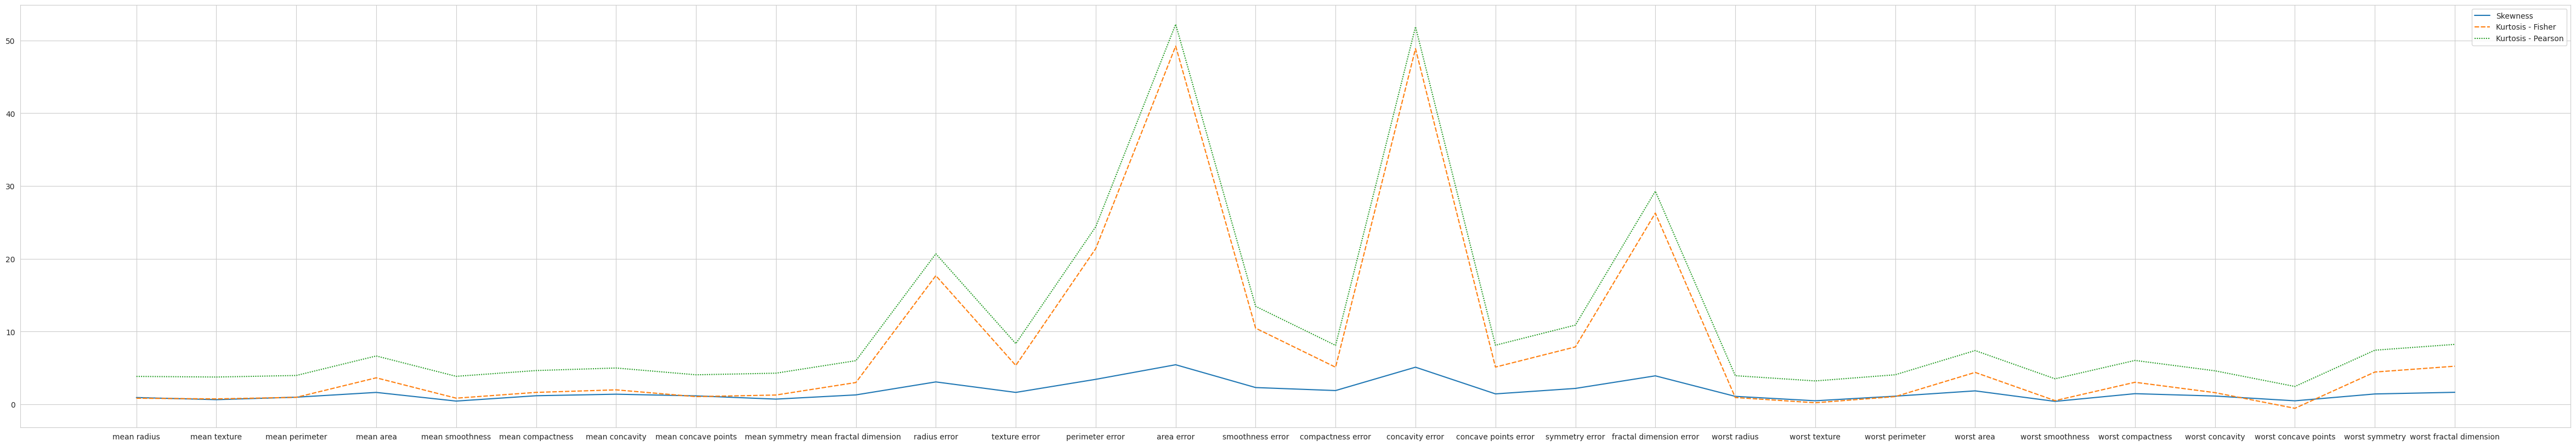

In [18]:
# Using Seaborn
# Figure size has to be large to accommodate all the x-axis labels
plt.figure(figsize = (60,10))
# Lineplot using seaborn
sns.lineplot(data = dtf_2)

Or in Matplotlib...

N.B: Matplotlib plots are rendered as an image by default. Thus, any scaling/zooming will seriously distort their quality.

Instead, always render your plot as a scalable vector graphic (SVG). As the name suggests, they can be scaled without negatively affecting the plot's quality.

#Detecting Outliers using z-scores

Detecting outliers using z-scores is a statistical technique that helps identify data points that deviate significantly from the mean of a dataset. These outliers can sometimes distort the results of analysis or modeling. The z-score measures how many standard deviations a data point is away from the mean. A higher z-score indicates that a data point is farther from the mean and might be considered an outlier.
How can you determine utliers using this method?

1. Calculate the Mean and Standard Deviation: Calculate the mean and standard deviation of the numerical variable you want to analyze.

2. Compute Z-Scores: For each data point in the dataset, calculate its z-score using the formula:
```
z = (x - mean) / standard_deviation
```
where x is the value of the data point, mean is the mean of the dataset, and standard_deviation is the standard deviation of the dataset.

3. Set a Threshold: Choose a threshold value that defines how far a z-score must be from the mean to be considered an outlier. A common threshold is typically set at around 2 or 3 standard deviations away from the mean.

4. Identify Outliers: Data points with z-scores above the chosen threshold are considered outliers. These are the points that deviate significantly from the average behavior of the dataset.

5. Handle Outliers: Once you've identified outliers, you can choose to handle them in various ways, such as removing them, transforming them, or treating them specially in your analysis.

In [19]:
#Detect outliers using z-score
from scipy.stats import zscore

z_scores = np.abs(zscore(df['mean radius'])) # Calculate z-scores: absolute value of the z-score of the target column
threshold = 3 # set threshold
outliers = np.where(z_scores > threshold)

#Now, if we wish to remove the outliers:
cleaned_df = df[(z_scores < threshold)]


In [20]:
cleaned_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Observe that this has a shape of (564,31). That means 5 rows were not included, as they were treated as "outliers".